In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
    print(f"{dirpath} 디렉토리에는 {len(dirnames)}개의 디렉토리가 존재하고 {len(filenames)}개의 파일이 존재합니다.")

10_food_classes_10_percent 디렉토리에는 2개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
10_food_classes_10_percent\test 디렉토리에는 10개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
10_food_classes_10_percent\test\chicken_curry 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\chicken_wings 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\fried_rice 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\grilled_salmon 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\hamburger 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\ice_cream 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\pizza 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\ramen 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\steak 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\sushi 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\train 디렉토리에는 10개의 디렉토리가 존재하고 0개

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

print("학습 이미지 : ")
train_data_10_percent = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

print("테스트 이미지 : ")
test_data_10_percent = train_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

학습 이미지 : 
Found 750 images belonging to 10 classes.
테스트 이미지 : 
Found 2500 images belonging to 10 classes.


In [7]:
# callbacks : 모델을 학습하는 중이거나 완료 후에 특별한 기능을 추가하고자 할 때 사용하는 개념!
# 지난 주에 callbacks을 사용! epoch 마다 학습이 어떻게 되는지 확인

# learning_rate_scheduler
# Model checkpointing
# Early stopping 
# Experiment tracking with TensorBoard

In [8]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir = log_dir
    )
    print(f"TensorBoard log 파일들은 {log_dir}에 저장했습니다.")
    return tensorboard_callback

In [9]:

# 학습 (training)을 하고 싶은데...
# 1. 지난 주처럼 직접 하나하나 모델을 만들어가기!
# 2. 남들이 잘 만들어놓은 모델을 가져와서 나만의 데이터셋으로 학습!

# ==> 우리가 하고 싶은 목적에 맞는 모델을 찾아야 한다!
# ==> 그래서!, TensorFlow Hub가 존재한다!

In [10]:
!pip install tensorflow-hub==0.11.0

You should consider upgrading via the 'E:\20211027\workspace\lecture_night\venv_test\Scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
from tensorflow.keras import layers

In [12]:
import tensorflow_hub as hub


In [13]:
print(tf.__version__)

2.5.0


In [14]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5"
efficientnet_url = "https://tfhub.dev/google/efficientnet/b3/feature-vector/1"

In [15]:
def create_model(model_url, num_classes = 10):
    feature_extractor_layer = hub.KerasLayer(
        model_url,
        trainable = False,
        name = "feature_extraction_layer",
        input_shape = IMAGE_SHAPE + (3, )
    )

    model = tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(num_classes, activation="softmax", name = "output_layer")
    ])

    return model

In [16]:
resnet_model = create_model(resnet_url, num_classes = train_data_10_percent.num_classes)

resnet_model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [17]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              58331648  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 58,352,138
Trainable params: 20,490
Non-trainable params: 58,331,648
_________________________________________________________________


In [18]:
!pip install SciPy

import scipy

You should consider upgrading via the 'E:\20211027\workspace\lecture_night\venv_test\Scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
resnet_history = resnet_model.fit(
    train_data_10_percent,
    epochs = 5,
    validation_data = test_data_10_percent,
    callbacks = [
        create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name= "resnet")
    ]
)

TensorBoard log 파일들은 tensorflow_hub/resnet/20211102-125611에 저장했습니다.
Epoch 1/5
24/24 [==============================] - 601s 26s/step - loss: 1.9155 - accuracy: 0.3760 - val_loss: 1.1084 - val_accuracy: 0.6508
Epoch 2/5
24/24 [==============================] - 612s 26s/step - loss: 0.8307 - accuracy: 0.7400 - val_loss: 0.7747 - val_accuracy: 0.7628
Epoch 3/5
24/24 [==============================] - 555s 24s/step - loss: 0.5285 - accuracy: 0.8600 - val_loss: 0.7105 - val_accuracy: 0.7644
Epoch 4/5
24/24 [==============================] - 531s 23s/step - loss: 0.4091 - accuracy: 0.8907 - val_loss: 0.6611 - val_accuracy: 0.7764
Epoch 5/5
24/24 [==============================] - 528s 23s/step - loss: 0.3185 - accuracy: 0.9307 - val_loss: 0.6166 - val_accuracy: 0.7992


In [27]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot Loss
    plt.plot(epochs, loss, label = "traning_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = "traning_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


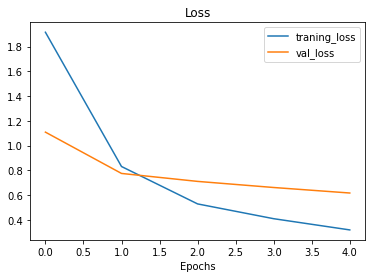

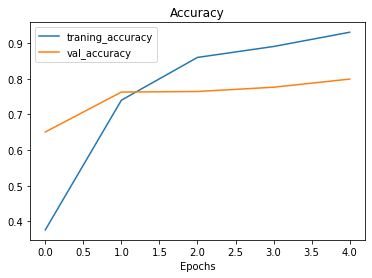

In [28]:
plot_loss_curves(resnet_history)

In [25]:
efficientnet_model = create_model(efficientnet_url, num_classes = train_data_10_percent.num_classes)

efficientnet_model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

efficientnet_history = efficientnet_model.fit(
    train_data_10_percent,
    epochs = 5,
    validation_data = test_data_10_percent,
    callbacks = [
        create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name= "efficientnet")
    ]
)

TensorBoard log 파일들은 tensorflow_hub/efficientnet/20211102-135500에 저장했습니다.
Epoch 1/5
24/24 [==============================] - 199s 8s/step - loss: 1.7003 - accuracy: 0.5013 - val_loss: 1.1353 - val_accuracy: 0.7648
Epoch 2/5
24/24 [==============================] - 200s 9s/step - loss: 0.9325 - accuracy: 0.7920 - val_loss: 0.7438 - val_accuracy: 0.8328
Epoch 3/5
24/24 [==============================] - 183s 8s/step - loss: 0.6584 - accuracy: 0.8520 - val_loss: 0.6010 - val_accuracy: 0.8556
Epoch 4/5
24/24 [==============================] - 186s 8s/step - loss: 0.5284 - accuracy: 0.8867 - val_loss: 0.5355 - val_accuracy: 0.8676
Epoch 5/5
24/24 [==============================] - 195s 8s/step - loss: 0.4454 - accuracy: 0.9053 - val_loss: 0.4952 - val_accuracy: 0.8708


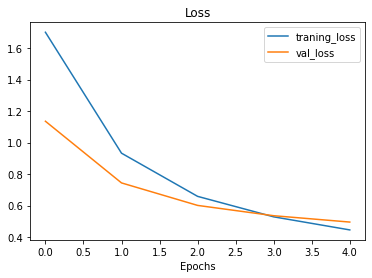

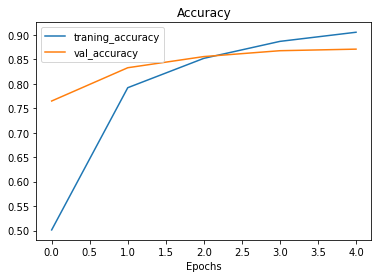

In [29]:
plot_loss_curves(efficientnet_history)

In [30]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1536)              10783528  
_________________________________________________________________
output_layer (Dense)         (None, 10)                15370     
Total params: 10,798,898
Trainable params: 15,370
Non-trainable params: 10,783,528
_________________________________________________________________


In [33]:
# 터미널 창에서 실행해주세요!
tensorboard dev upload --logdir ./tensorflow_hub/ --name "ee" --one_shot

^C


In [ ]:
# --logdir : 업로드 대상 디렉토리 지정
# --name : 실험 (experiment)의 이름
# --description : 실험에 대한 간단한 설명
# --one_shot : 1번에 업로드하고 마무리

In [34]:
# 터미널 창에서
tensorboard dev list

^C


2021-11-02 21:09:49.315203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-02 21:09:49.316208: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Total: 1 experiment(s)


https://tensorboard.dev/experiment/CyuN1X3uQUWsQWgYD0Xnfg/
	Name                 Efficient와 Resnet
	Description          강의자료
	Id                   CyuN1X3uQUWsQWgYD0Xnfg
	Created              2021-11-02 21:03:28 (6 minutes ago)
	Updated              2021-11-02 21:03:39 (6 minutes ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  13064652


In [ ]:
tensorboard dev delete --experiment_id CyuN1X3uQUWsQWgYD0Xnfg